In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow
import numpy as np
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
from keras.preprocessing.image import ImageDataGenerator

In [3]:
given_dataset='/content/drive/MyDrive/lungs_neg_pos'

**<font color="orange">1st step:   Split the dataset into train ,validation & test</font>**

In [4]:
#pip install split-folders

In [5]:
import splitfolders

In [6]:
splitfolders.ratio(given_dataset, output='/content/drive/MyDrive/Dataset_Lung_Cancer/output_split_lungs',seed=42, ratio=(.7, .2, .1),group_prefix=None)

In [7]:
train_images=r"/content/drive/MyDrive/Dataset_Lung_Cancer/output_split_lungs/train"
validation_images=r"/content/drive/MyDrive/Dataset_Lung_Cancer/output_split_lungs/val"
test_images=r"/content/drive/MyDrive/Dataset_Lung_Cancer/output_split_lungs/test"

**<font color="orange">2nd step:Data preprocessing on train,test and validation images</font>**

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_images,target_size=(150, 150),batch_size=20,
class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(validation_images,target_size=(150, 150),batch_size=20,
class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_images,target_size=(150, 150),batch_size=20,
class_mode='binary')



Found 326 images belonging to 2 classes.
Found 92 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


**<font color="orange">3rd step:  Apply CNN model </font>**

In [9]:
from keras import layers
from keras import models
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

**<font color="orange">4th step:  Compile the CNN model </font>**

In [11]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])

**<font color="orange">5th step:  Fit or train the CNN model </font>**

In [12]:
history = model.fit(train_generator,epochs=30,validation_data=validation_generator)

Epoch 1/30
17/17 [==============================] - 103s 6s/step - loss: 0.6943 - acc: 0.5368 - val_loss: 0.6692 - val_acc: 0.8478
Epoch 2/30
17/17 [==============================] - 5s 271ms/step - loss: 0.6798 - acc: 0.5859 - val_loss: 0.6508 - val_acc: 0.7826
Epoch 3/30
17/17 [==============================] - 7s 411ms/step - loss: 0.6492 - acc: 0.6718 - val_loss: 0.6224 - val_acc: 0.5435
Epoch 4/30
17/17 [==============================] - 5s 286ms/step - loss: 0.6193 - acc: 0.7025 - val_loss: 0.5519 - val_acc: 0.8261
Epoch 5/30
17/17 [==============================] - 6s 357ms/step - loss: 0.5860 - acc: 0.6963 - val_loss: 0.4944 - val_acc: 0.8587
Epoch 6/30
17/17 [==============================] - 5s 301ms/step - loss: 0.5172 - acc: 0.7761 - val_loss: 0.4461 - val_acc: 0.8370
Epoch 7/30
17/17 [==============================] - 5s 271ms/step - loss: 0.4859 - acc: 0.7975 - val_loss: 0.3935 - val_acc: 0.8913
Epoch 8/30
17/17 [==============================] - 6s 348ms/step - loss: 0.4

**<font color="orange">6th step:  Save the CNN model </font>**

In [13]:
model.save('/content/drive/MyDrive/Dataset_Lung_Cancer/lungs.keras')

**<font color="orange">7th step:  Plot the CNN model </font>**

range(1, 31)


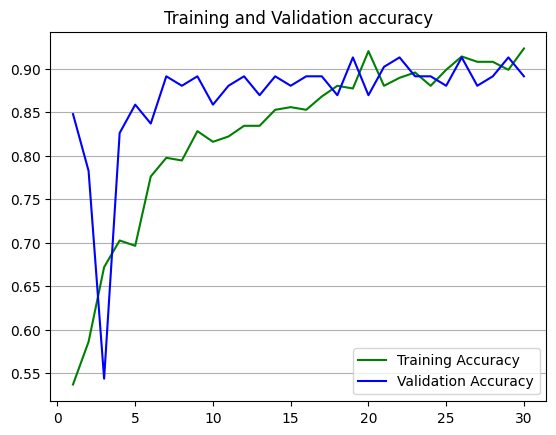

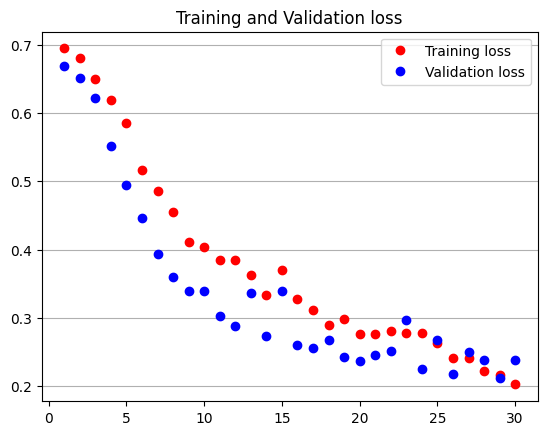

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']  #variable name = val_acc
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
print(epochs)
#accuracy graph
plt.plot(epochs, acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.grid(axis='y')
plt.legend()
plt.figure()
#loss graph
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation loss')
plt.grid(axis='y')
plt.legend()
plt.show()

**<font color="orange">8th step:  Evaluate the model on the test data</font>**

In [17]:
score = model.evaluate(test_generator)
print(score)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 204ms/step - loss: 0.1342 - acc: 0.9167
[0.1342117339372635, 0.9166666865348816]
Test loss: 0.1342117339372635
Test accuracy: 0.9166666865348816
